<h2>A description of the problem and a discussion of the background. </h2>

<h4>Background</h4>
<p>In Japan, there are 2 major cities with many different kind of restaurant. We would like to investigate what is the different for these two cities. Sapporo is located in North, Kyoto is located in the middle of Japan.</p>
<p>Based on this study, restaurant investor or commercial ads company can know more about the area and benefit to their business by leverage those insight from the study. For example, if we can see some kind of restaurant is popular in both cities, then it may be a great opportunities to open chain-restaurant in Japan.</p>

<h4>Problem</h4>
<p>1. what is the most popular type of restaurant in the area (Kyoto and Sapporo)</p>
<p>2. How strong the competition for the same kind of restaurant by clustering</p> 
<p>3. what is the similarities and disimilarties between Kyoto and Sapporo</p>

<h2>A description of the data and how it will be used to solve the problem. </h2>

<p>Using Foursquare API can search restaurant type and distance. Those data can tell us what kind of restaurant popular in the area and see if there are competition. </p>

<p>'Food' is the filter and 'Kyoto Station'/'Sapporo Station' is the location to search in Foursquare. Those information will be passed through search query and set limit to 100 as there are too many restaurant nearby. Restaurant Name, Type and Location will be expected in JSON. We will work on Kyoto first then go for Sapporo.</p>
<p>Extract JSON via Foursquare API, Transform using Jupyter Notebook in IBM CloudPak, then load into Dataframe.</p>

In [2]:
import json, requests
url = 'https://api.foursquare.com/v2/venues/explore'

kyt_params = dict(
client_id='',
client_secret='',
v='20180323',
ll='34.9858,135.7588',
query='food',
limit=500
)

sap_params = dict(
client_id='',
client_secret='',
v='20180323',
ll='43.0678,141.3504',
query='food',
limit=500
)

kyt_resp = requests.get(url=url, params=kyt_params)
sap_resp = requests.get(url=url, params=sap_params)

#Load Data from Response
kyt_data = json.loads(kyt_resp.text)
sap_data = json.loads(sap_resp.text)


In [3]:
print(kyt_data)
#'京都' means Kyoto
#'駅', 'JR' means Train Station

{'meta': {'code': 200, 'requestId': '6008ddd5f7c8ca3b75c63d2a'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'suggestedRadius': 600, 'headerLocation': 'Kyoto', 'headerFullLocation': 'Kyoto', 'headerLocationGranularity': 'city', 'query': 'food', 'totalResults': 115, 'suggestedBounds': {'ne': {'lat': 34.99076439387873, 'lng': 135.76442535945048}, 'sw': {'lat': 34.981516302240486, 'lng': 135.75311616351146}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c6cf77765eda093544e4dd0', 'name': 'Saryo Tsujiri (茶寮 都路里)', 'contact': {}, 'location': {'address': '下京区東塩小路町901', 'crossStreet': 'ジェイアール京都伊勢丹 6F', 'lat': 34.986399524781184, 'lng': 135.7578522947974, 'labeledLatLngs': [{'label': 'display', 'lat': 34.986399524781184, 'lng': 135.7578522947974}]

In [4]:
print(sap_data)
#'札幌' means Sappporo
#'駅', 'JR' means Train Station

{'meta': {'code': 200, 'requestId': '6008ddd50d7dc976f70e54c4'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'suggestedRadius': 600, 'headerLocation': 'Sapporo', 'headerFullLocation': 'Sapporo', 'headerLocationGranularity': 'city', 'query': 'food', 'totalResults': 160, 'suggestedBounds': {'ne': {'lat': 43.072063484997585, 'lng': 141.3557638133522}, 'sw': {'lat': 43.06220982692918, 'lng': 141.34341579960284}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '50ac7a73e4b02888e570ff02', 'name': 'Rikyu (牛たん炭焼 利久)', 'contact': {}, 'location': {'address': '北区北6条西2-1-7', 'crossStreet': '札幌パセオ WEST B1F', 'lat': 43.068355070857564, 'lng': 141.34961754693623, 'labeledLatLngs': [{'label': 'display', 'lat': 43.068355070857564, 'lng': 141.34961754693623}],

In [5]:
import pandas as pd

kyt_data_response = kyt_data['response']['groups'][0]['items']
sap_data_response = sap_data['response']['groups'][0]['items']

In [6]:
print(kyt_data_response)

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c6cf77765eda093544e4dd0', 'name': 'Saryo Tsujiri (茶寮 都路里)', 'contact': {}, 'location': {'address': '下京区東塩小路町901', 'crossStreet': 'ジェイアール京都伊勢丹 6F', 'lat': 34.986399524781184, 'lng': 135.7578522947974, 'labeledLatLngs': [{'label': 'display', 'lat': 34.986399524781184, 'lng': 135.7578522947974}], 'distance': 109, 'postalCode': '600-8216', 'cc': 'JP', 'city': '京都市', 'state': '京都府', 'country': '日本', 'formattedAddress': ['下京区東塩小路町901 (ジェイアール京都伊勢丹 6F)', '京都市, 京都府', '600-8216', '日本']}, 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0, 'usersCount': 0, 'checkinsCount': 0, 'visitsCount': 0}, 'beenHere': {'count': 0, 'lastCheckinExpired

In [7]:
print(sap_data_response)

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '50ac7a73e4b02888e570ff02', 'name': 'Rikyu (牛たん炭焼 利久)', 'contact': {}, 'location': {'address': '北区北6条西2-1-7', 'crossStreet': '札幌パセオ WEST B1F', 'lat': 43.068355070857564, 'lng': 141.34961754693623, 'labeledLatLngs': [{'label': 'display', 'lat': 43.068355070857564, 'lng': 141.34961754693623}], 'distance': 88, 'postalCode': '060-0806', 'cc': 'JP', 'city': '札幌市', 'state': '北海道', 'country': '日本', 'formattedAddress': ['北区北6条西2-1-7 (札幌パセオ WEST B1F)', '札幌市, 北海道', '060-0806', '日本']}, 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0, 'usersCount': 0, 'checkinsCount': 0, 'visitsCount': 0}, 'beenHere':

In [8]:
from pandas.io.json import json_normalize

kyt_dataframe = json_normalize(kyt_data_response)
#dataframe.to_excel("kyt_output.xlsx")

sap_dataframe = json_normalize(sap_data_response)
#dataframe.to_excel("sap_output.xlsx")

C:\Users\T07195GESD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\T07195GESD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [9]:
kyt_dataframe.head(15)

referralId  reasons.count  \
0    e-0-4c6cf77765eda093544e4dd0-0              0   
1    e-0-4be4f115910020a12b81d214-1              0   
2    e-0-4c3ab516def90f472fdbfc2d-2              0   
3    e-0-4b792a7cf964a520a4ed2ee3-3              0   
4    e-0-595735908e886a485cac140b-4              0   
5    e-0-5ab0c5f566f3cd6c4b689e84-5              0   
6    e-0-50be8c9ee4b06e050be7f8d2-6              0   
7    e-0-4c42d01bda3dc9283e11cbb9-7              0   
8    e-0-4d2719ffb818a35d0a3e888a-8              0   
9    e-0-4b641759f964a520949e2ae3-9              0   
10  e-0-4bf0be0917880f47eeae2937-10              0   
11  e-0-532acf32498e86b961d3dd1d-11              0   
12  e-0-4c2d5fed987f20a1a07349aa-12              0   
13  e-0-4b9f5813f964a5209c1d37e3-13              0   
14  e-0-4b6cd3dcf964a5206a572ce3-14              0   

                                        reasons.items  \
0   [{'summary': 'This spot is popular', 'type': '...   
1   [{'summary': 'This spot is popular', 'type': '...   
2   [{'summary': 'This spot is popular', 'type': '...   
3   [{'summary': 'This spot is popular', 'type': '...   
4   [{'summary': 'This spot is popular', 'type': '...   
5   [{'summary': 'This spot is popular', 'type': '...   
6   [{'summary': 'This spot is popular', 'type': '...   
7   [{'summary': 'This spot is popular', 'type': '...   
8   [{'summary': 'This spot is popular', 'type': '...   
9   [{'summary': 'This spot is popular', 'type': '...   
10  [{'summary': 'This spot is popular', 'type': '...   
11  [{'summary': 'This spot is popular', 'type': '...   
12  [{'summary': 'This spot is popular', 'type': '...   
13  [{'summary': 'This spot is popular', 'type': '...   
14  [{'summary': 'This spot is popular', 'type': '...   

                    venue.id                           venue.name  \
0   4c6cf77765eda093544e4dd0               Saryo Tsujiri (茶寮 都路里)   
1   4be4f115910020a12b81d214                     Katsukura (かつくら)   
2   4c3ab516def90f472fdbfc2d         Nakamura Tokichi (中村藤吉 京都駅店)   
3   4b792a7cf964a520a4ed2ee3                    SIZUYA (志津屋 京都駅店)   
4   595735908e886a485cac140b                            Food Hall   
5   5ab0c5f566f3cd6c4b689e84     Kanazawa Maimon Sushi (金沢まいもん寿司)   
6   50be8c9ee4b06e050be7f8d2                DONGURI (どんぐり 京都駅前東店)   
7   4c42d01bda3dc9283e11cbb9            Pontoiru (京風スパゲッティー 先斗入ル)   
8   4d2719ffb818a35d0a3e888a                          進々堂 JR京都駅前店   
9   4b641759f964a520949e2ae3                                551蓬莱   
10  4bf0be0917880f47eeae2937                     Tagoto (京料理 田ごと)   
11  532acf32498e86b961d3dd1d          Dashi-chazuke En (だし茶漬け えん)   
12  4c2d5fed987f20a1a07349aa                               塩小路カフェ   
13  4b9f5813f964a5209c1d37e3                                 はしたて   
14  4b6cd3dcf964a5206a572ce3  Honke Daiichi-Asahi (本家 第一旭 たかばし本店)   

   venue.location.address  venue.location.crossStreet  venue.location.lat  \
0             下京区東塩小路町901              ジェイアール京都伊勢丹 6F           34.986400   
1             下京区東塩小路町901      京都駅ビル専門店街 The CUBE 11F           34.985852   
2             下京区東塩小路町901          スバコ・ジェイアール京都伊勢丹 3F           34.985350   
3             下京区東塩小路町8-3                     京都駅八条西口           34.984239   
4           下京区東塩小路町721-1                京都タワーサンド B1F           34.987396   
5             下京区東塩小路町902                         ポルタ           34.986807   
6           下京区東塩小路町544-2                 塩小路通東洞院西入北側           34.987410   
7             下京区東塩小路町901      京都駅ビル専門店街 The CUBE 11F           34.985822   
8             下京区東塩小路町902  烏丸通塩小路下る 京都駅前JRバスチケットセンター内           34.986109   
9           下京区東塩小路高倉町8-3                        八条小町           34.984505   
10            下京区東塩小路町902                  京都駅前地下街ポルタ           34.986951   
11            下京区東塩小路町902               京都駅前地下街 Porta           34.986728   
12            下京区東塩小路町901           JR京都駅 0番のりば 陸橋通路下           34.985485   
13            下京区東塩小路町901          スバコ・ジェイアール京都伊勢丹 3F           

In [10]:
sap_dataframe.head(15)

referralId  reasons.count  \
0    e-0-50ac7a73e4b02888e570ff02-0              0   
1    e-0-4b6d3cb6f964a520f16c2ce3-1              0   
2    e-0-4b626b9df964a520ec462ae3-2              0   
3    e-0-5468286d498e87b190fbbb9c-3              0   
4    e-0-56383361cd102b4591fae138-4              0   
5    e-0-4e2113331838712abe6e83e8-5              0   
6    e-0-4ba746caf964a520348939e3-6              0   
7    e-0-4e21268715207ed86eb59993-7              0   
8    e-0-4d2d290839a3548174ddb520-8              0   
9    e-0-4e0b0998ae60e479ad9c35f2-9              0   
10  e-0-52777785498ed3c3cb1639d6-10              0   
11  e-0-5a7e4c58840fc24945b376cf-11              0   
12  e-0-4b87427ff964a52010b931e3-12              0   
13  e-0-4bccb83d0687ef3b24c6dfcc-13              0   
14  e-0-4d735eecff6ba35d8bcd7b8a-14              0   

                                        reasons.items  \
0   [{'summary': 'This spot is popular', 'type': '...   
1   [{'summary': 'This spot is popular', 'type': '...   
2   [{'summary': 'This spot is popular', 'type': '...   
3   [{'summary': 'This spot is popular', 'type': '...   
4   [{'summary': 'This spot is popular', 'type': '...   
5   [{'summary': 'This spot is popular', 'type': '...   
6   [{'summary': 'This spot is popular', 'type': '...   
7   [{'summary': 'This spot is popular', 'type': '...   
8   [{'summary': 'This spot is popular', 'type': '...   
9   [{'summary': 'This spot is popular', 'type': '...   
10  [{'summary': 'This spot is popular', 'type': '...   
11  [{'summary': 'This spot is popular', 'type': '...   
12  [{'summary': 'This spot is popular', 'type': '...   
13  [{'summary': 'This spot is popular', 'type': '...   
14  [{'summary': 'This spot is popular', 'type': '...   

                    venue.id  \
0   50ac7a73e4b02888e570ff02   
1   4b6d3cb6f964a520f16c2ce3   
2   4b626b9df964a520ec462ae3   
3   5468286d498e87b190fbbb9c   
4   56383361cd102b4591fae138   
5   4e2113331838712abe6e83e8   
6   4ba746caf964a520348939e3   
7   4e21268715207ed86eb59993   
8   4d2d290839a3548174ddb520   
9   4e0b0998ae60e479ad9c35f2   
10  52777785498ed3c3cb1639d6   
11  5a7e4c58840fc24945b376cf   
12  4b87427ff964a52010b931e3   
13  4bccb83d0687ef3b24c6dfcc   
14  4d735eecff6ba35d8bcd7b8a   

                                          venue.name venue.location.address  \
0                                   Rikyu (牛たん炭焼 利久)            北区北6条西2-1-7   
1                       Nemuro Hanamaru (回転寿司 根室花まる)             中央区北5条西2-5   
2                  Curry House Colombo (カリーハウス コロンボ)               中央区北4条西4   
3                  Tokachi Butadon Ippin (十勝豚丼 いっぴん)             中央区北5条西2-5   
4                                175°DENO〜担担麺〜札幌駅北口店           中央区北7条西4-1-1   
5                         Tonkatsu Tamafuji (とんかつ玉藤)             中央区北5条西2-1   
6                             Tonkatsu Wako (とんかつ和幸)            北区北6条西4-3-1   
7                       Shiki Hanamaru (町のすし家 四季花まる)            北区北6条西2-1-7   
8                                       焼肉レストラン プライム               中央区北4条西5   
9                                     Pomme's (ポムの樹)             中央区北5条西2-5   
10                Okushiba Shoten (スープカリー奥芝商店 駅前創成寺)           中央区北4条西1-1-3   
11                                      六花亭 札幌本店 喫茶室           中央区北4条西6-3-3   
12                                   Sushi Zen (すし善)             中央区北5条西4-7   
13  The Buffet Daimaru Sapporoten (THE BUFFET 大丸札幌店)             中央区北5条西4-7   
14                  Hakodate Uni Murakami (函館うにむらかみ)           中央区北3条西4-1-1   

   venue.location.crossStreet  venue.location.lat  venue.location.lng  \
0              札幌パセオ WEST B1F           43.068355          141.349618   
1                札幌ステラプレイス 6F           43.067916          141.350547   
2                  札幌国際ビル B1F           43.066001          141.350587   
3                札幌ステラプレイス 6F           43.068070          141.351404   
4                  東カン札幌ビル 1F           43.069043          141.349416   
5                   札幌エスタ 10F  

In [11]:
df_k = pd.DataFrame(kyt_dataframe,columns=['venue.categories','venue.name','venue.location.lat','venue.location.lng'])
df_s = pd.DataFrame(sap_dataframe,columns=['venue.categories','venue.name','venue.location.lat','venue.location.lng'])

In [12]:
df_k1=df_k
for ki, krow in df_k1.iterrows():
    #df_k1['type_of_food']=df_k1['venue.categories'][1][0]['name']
    the_type = krow['venue.categories'][0]['name']
    #Deprecated
    #df_k1.set_value(ki, 'venue.categories', the_type)
    df_k1.at[ki,'venue.categories']=the_type
#df_k1['reasons.items']=dict(df_k['reasons.items'])
df_k1.head()

venue.categories                    venue.name  venue.location.lat  \
0                 Café        Saryo Tsujiri (茶寮 都路里)           34.986400   
1  Tonkatsu Restaurant              Katsukura (かつくら)           34.985852   
2                 Café  Nakamura Tokichi (中村藤吉 京都駅店)           34.985350   
3               Bakery             SIZUYA (志津屋 京都駅店)           34.984239   
4           Food Court                     Food Hall           34.987396   

   venue.location.lng  
0          135.757852  
1          135.757704  
2          135.758260  
3          135.758728  
4          135.759443

In [13]:
df_s1=df_s
for si, srow in df_s1.iterrows():
    #df_k1['type_of_food']=df_k1['venue.categories'][1][0]['name']
    the_type = srow['venue.categories'][0]['name']
    #Deprecated
    #df_s1.set_value(si, 'venue.categories', the_type)
    df_s1.at[si,'venue.categories']=the_type
#df_k1['reasons.items']=dict(df_k['reasons.items'])
df_s1.head()

venue.categories                         venue.name  \
0        Japanese Restaurant                   Rikyu (牛たん炭焼 利久)   
1           Sushi Restaurant       Nemuro Hanamaru (回転寿司 根室花まる)   
2  Japanese Curry Restaurant  Curry House Colombo (カリーハウス コロンボ)   
3         Donburi Restaurant  Tokachi Butadon Ippin (十勝豚丼 いっぴん)   
4               Noodle House                175°DENO〜担担麺〜札幌駅北口店   

   venue.location.lat  venue.location.lng  
0           43.068355          141.349618  
1           43.067916          141.350547  
2           43.066001          141.350587  
3           43.068070          141.351404  
4           43.069043          141.349416

In [14]:
df_k1=df_k1.reset_index()
df_k1['venue.categories'].value_counts()

Japanese Restaurant          24
Okonomiyaki Restaurant        8
Café                          7
Food Court                    4
Sushi Restaurant              4
BBQ Joint                     4
Steakhouse                    4
Sukiyaki Restaurant           3
Kushikatsu Restaurant         3
Restaurant                    3
Spanish Restaurant            3
Italian Restaurant            3
Bakery                        3
Chinese Restaurant            2
French Restaurant             2
Yakitori Restaurant           2
Ramen Restaurant              2
Yoshoku Restaurant            2
Wagashi Place                 2
Dim Sum Restaurant            2
Noodle House                  1
Breakfast Spot                1
Tonkatsu Restaurant           1
Irish Pub                     1
Tapas Restaurant              1
Pizza Place                   1
Mediterranean Restaurant      1
Korean Restaurant             1
Buffet                        1
American Restaurant           1
Japanese Curry Restaurant     1
Soup Pla

In [15]:
df_s1=df_s1.reset_index()
df_s1['venue.categories'].value_counts()

Ramen Restaurant                 14
Café                             10
Sushi Restaurant                  7
Japanese Restaurant               7
Japanese Curry Restaurant         6
Tonkatsu Restaurant               4
Italian Restaurant                4
BBQ Joint                         4
Soba Restaurant                   4
Teishoku Restaurant               3
Chinese Restaurant                3
Donburi Restaurant                3
Noodle House                      2
Bakery                            2
Seafood Restaurant                2
Buffet                            2
Fast Food Restaurant              2
Yakitori Restaurant               2
Udon Restaurant                   2
Asian Restaurant                  1
Indian Restaurant                 1
Vegetarian / Vegan Restaurant     1
Yoshoku Restaurant                1
Soup Place                        1
Okonomiyaki Restaurant            1
Thai Restaurant                   1
Korean Restaurant                 1
Spanish Restaurant          

<h3>Pin-Point Data in Map</h3>

In [16]:
import folium

<h4>Kyoto Station Restaurant</h4>

In [35]:
# create map of Kyoto using latitude and longitude values
kyt_ll_para = kyt_params.get('ll')
kyt_ll=kyt_ll_para.split(',')

kyt_map = folium.Map(location=[kyt_ll[0], kyt_ll[1]], zoom_start=15)

# add markers to map
for lat, lng, cat, name in zip(df_k1['venue.location.lat'], df_k1['venue.location.lng'], df_k1['venue.categories'], df_k1['venue.name']):
    label = '[{}] {}'.format(cat, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(kyt_map)  
    
kyt_map

<h4>Sapporo Station Restaurant</h4>

In [18]:
# create map of Sapporo using latitude and longitude values
sap_ll_para = sap_params.get('ll')
sap_ll=sap_ll_para.split(',')

sap_map = folium.Map(location=[sap_ll[0], sap_ll[1]], zoom_start=15)

# add markers to map
for lat, lng, cat, name in zip(df_s1['venue.location.lat'], df_s1['venue.location.lng'], df_s1['venue.categories'], df_s1['venue.name']):
    label = '[{}] {}'.format(cat, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(sap_map) 
    
sap_map

<h3>k-means Clustering</h3>

<h5>Kyoto Restaurant Clustering</h5>

In [19]:
from sklearn.cluster import KMeans

kclusters = 5

df_k1_clustering = df_k1
df_k1_clustering = df_k1_clustering.drop('venue.categories', 1)
df_k1_clustering = df_k1_clustering.drop('venue.name', 1)
df_k1_clustering = df_k1_clustering.drop('index', 1)
#print(df_k1_clustering)

# run k-means clustering
kyt_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_k1_clustering)

# check cluster labels generated for each row in the dataframe
kyt_kmeans.labels_[0:10]

array([3, 3, 3, 3, 1, 2, 2, 3, 3, 3])

In [20]:
# add clustering labels
df_k1_merged=df_k1
df_k1_merged.drop('index', axis=1, inplace=True)

df_k1_merged['cluster'] = kyt_kmeans.labels_

print(df_k1_merged)

          venue.categories                    venue.name  venue.location.lat  \
0                     Café        Saryo Tsujiri (茶寮 都路里)           34.986400   
1      Tonkatsu Restaurant              Katsukura (かつくら)           34.985852   
2                     Café  Nakamura Tokichi (中村藤吉 京都駅店)           34.985350   
3                   Bakery             SIZUYA (志津屋 京都駅店)           34.984239   
4               Food Court                     Food Hall           34.987396   
..                     ...                           ...                 ...   
95  Okonomiyaki Restaurant                    お好み焼き なかがわ           34.987368   
96     Japanese Restaurant                            村川           34.987226   
97                    Café                        和束茶カフェ           34.986844   
98            Noodle House                         ちからもち           34.989398   
99      Chinese Restaurant                     中華美食店 中光園           34.987376   

    venue.location.lng  cluster  
0    

<h5>Sapporo Restaurant Clustering</h5>

In [21]:
df_s1_clustering = df_s1
df_s1_clustering = df_s1_clustering.drop('venue.categories', 1)
df_s1_clustering = df_s1_clustering.drop('venue.name', 1)
df_s1_clustering = df_s1_clustering.drop('index', 1)
#print(df_s1_clustering)

# run k-means clustering
sap_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_s1_clustering)

# check cluster labels generated for each row in the dataframe
sap_kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [22]:
# add clustering labels
df_s1_merged=df_s1
df_s1_merged.drop('index', axis=1, inplace=True)

df_s1_merged['cluster'] = sap_kmeans.labels_

print(df_s1_merged)

             venue.categories                         venue.name  \
0         Japanese Restaurant                   Rikyu (牛たん炭焼 利久)   
1            Sushi Restaurant       Nemuro Hanamaru (回転寿司 根室花まる)   
2   Japanese Curry Restaurant  Curry House Colombo (カリーハウス コロンボ)   
3          Donburi Restaurant  Tokachi Butadon Ippin (十勝豚丼 いっぴん)   
4                Noodle House                175°DENO〜担担麺〜札幌駅北口店   
..                        ...                                ...   
95                       Café           St. Marc Café (サンマルクカフェ)   
96           Ramen Restaurant                   らあめん がんてつ 札幌駅西口店   
97        Teishoku Restaurant                       Ootoya (大戸屋)   
98        Japanese Restaurant                           郷土料理 こふじ   
99                       Café              CAFE YOSHIMI 赤れんがテラス店   

    venue.location.lat  venue.location.lng  cluster  
0            43.068355          141.349618        0  
1            43.067916          141.350547        0  
2            43.06600

<h4>Kyoto Restaurant Clustering - Visulaize on Map</h4>

In [23]:
import numpy as np

import matplotlib.cm as cm
import matplotlib.colors as colors

In [36]:
# create map
kyt_map_cluster = folium.Map(location=[kyt_ll[0], kyt_ll[1]], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
#for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
for lat, lng, cat, name, cluster in zip(df_k1['venue.location.lat'], df_k1['venue.location.lng'], df_k1['venue.categories'], df_k1['venue.name'], df_k1['cluster']):
    label = folium.Popup('[Cluster ' + str(cluster) + '] ' + str(cat)+ ' - ' + str(name), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(kyt_map_cluster)
       
kyt_map_cluster

<h4>Sapporo Restaurant Clustering - Visulaize on Map</h4>

In [37]:
# create map
sap_map_cluster = folium.Map(location=[sap_ll[0], sap_ll[1]], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
#for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
for lat, lng, cat, name, cluster in zip(df_s1['venue.location.lat'], df_s1['venue.location.lng'], df_s1['venue.categories'], df_s1['venue.name'], df_s1['cluster']):
    label = folium.Popup('[Cluster ' + str(cluster) + '] ' + str(cat)+ ' - ' + str(name), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(sap_map_cluster)
       
sap_map_cluster

<h3>Summary</h3>

<h4>Kyoto Top 10 Restaurant Type</h4>

Text(0, 0.5, 'Count')

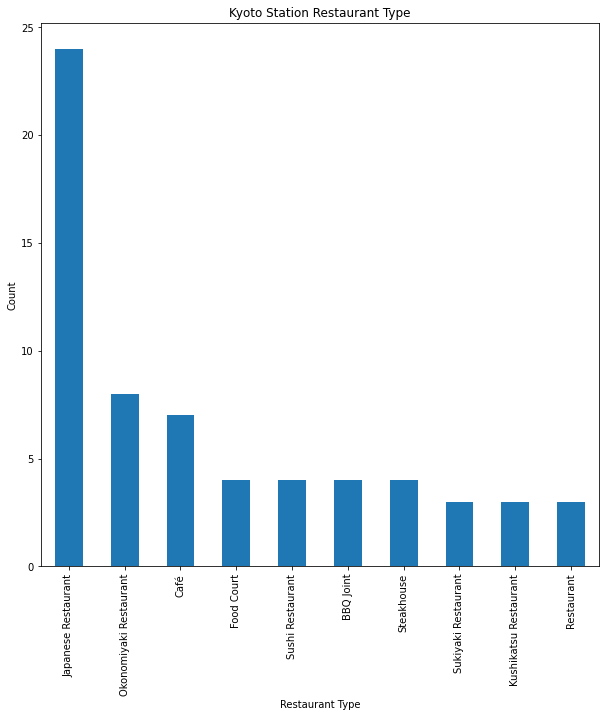

In [26]:
k_plt_cat = df_k1['venue.categories'].value_counts()[:10].plot(kind='bar',
                                    figsize=(10,10),
                                    sort_columns=True,
                                    title="Kyoto Station Restaurant Type")
k_plt_cat.set_xlabel("Restaurant Type")
k_plt_cat.set_ylabel("Count")


<h4>Sapporo Top 10 Restaurant Type</h4>

Text(0, 0.5, 'Count')

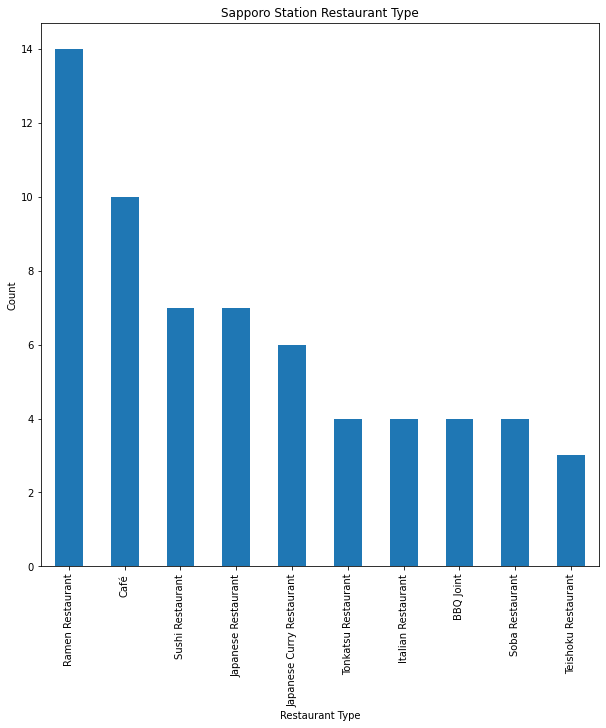

In [27]:
s_plt_cat = df_s1['venue.categories'].value_counts()[:10].plot(kind='bar',
                                    figsize=(10,10),
                                    sort_columns=True,
                                    title="Sapporo Station Restaurant Type")
s_plt_cat.set_xlabel("Restaurant Type")
s_plt_cat.set_ylabel("Count")


In [28]:
df_k1x = df_k1
df_k1x['area']='Kyoto'

df_s1x = df_s1
df_s1x['area']='Sapporo'

df_k1xs = df_k1['venue.categories'].value_counts().reset_index()
df_s1xs = df_s1['venue.categories'].value_counts().reset_index()

#df_k1xgs = df_k1.groupby(['cluster','venue.categories'])['venue.categories'].count().unstack(1).plot.bar(figsize=(8, 6))
#df_s1xgs = df_s1['venue.categories'].value_counts().reset_index()

In [29]:

from plotly import graph_objects as go

fig = go.Figure(
    data=[
        go.Bar(
            name="Kyoto",
            x=df_k1xs["index"],
            y=df_k1xs["venue.categories"],
            offsetgroup=1,
        ),
         go.Bar(
            name="Sapporo",
            x=df_s1xs["index"],
            y=df_s1xs["venue.categories"],
            offsetgroup=1,
        ),
    ],
    layout=go.Layout(
        title="Summary on Restaurant Type",
        yaxis_title="No. of Restaurant (Count)"
    )
)

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()


<h3>Clustering Summary</h3>

In [30]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

<h4>Clustering x Restaurant Type in Kyoto</h4>

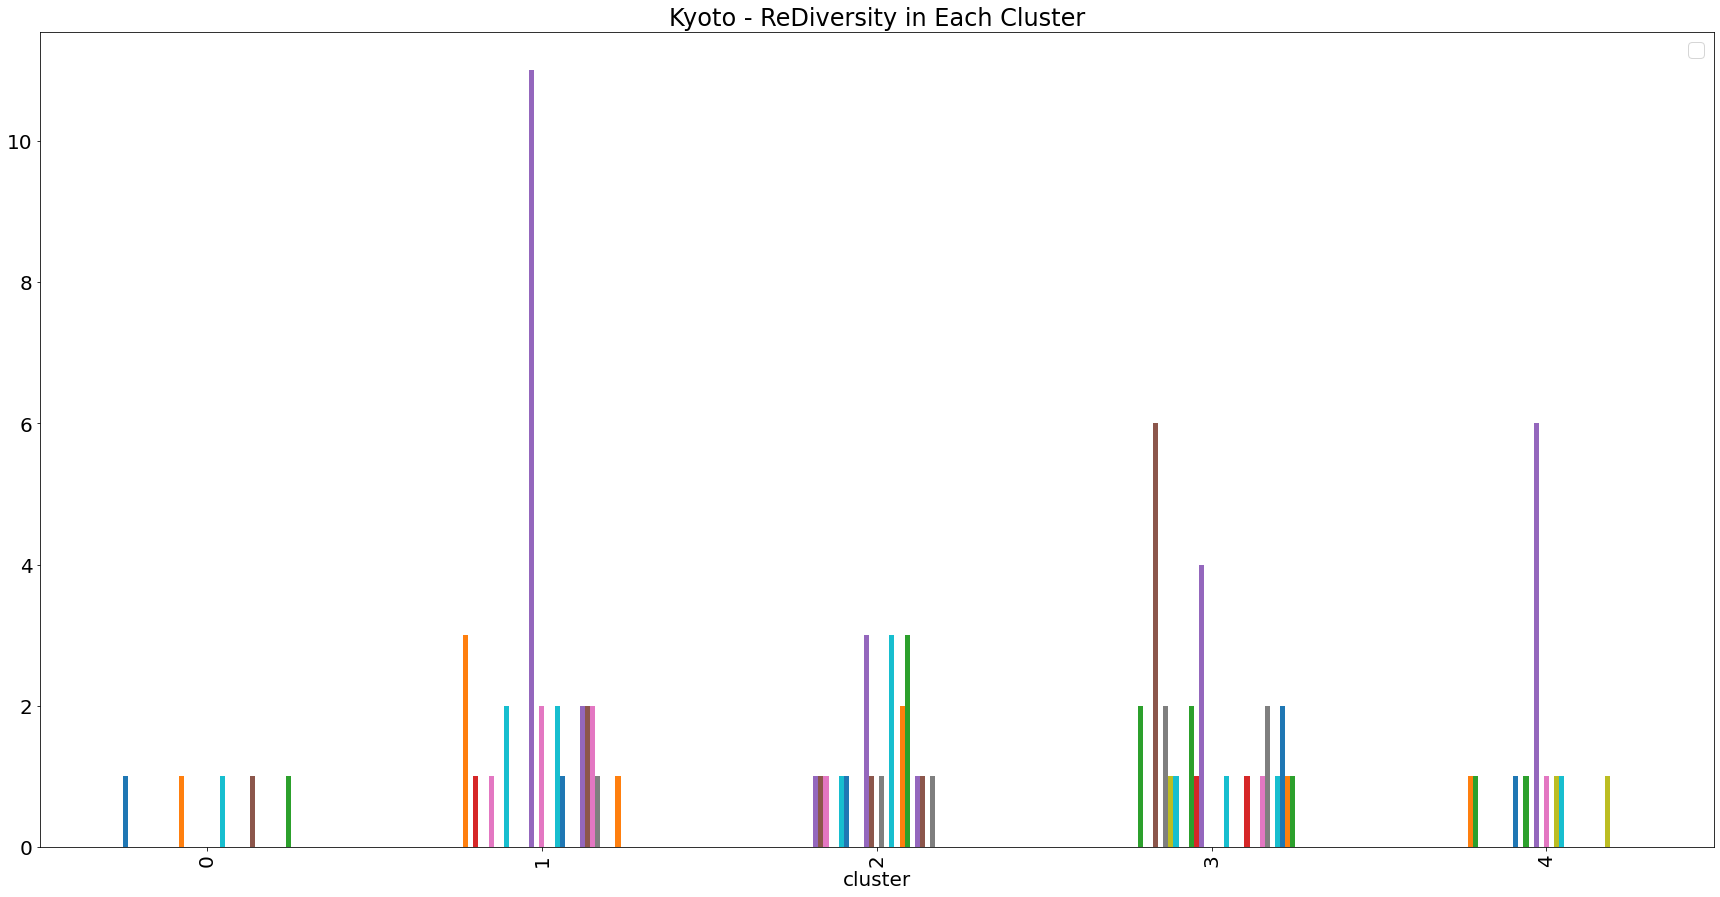

In [31]:
df_k1xgs = df_k1.groupby(['cluster','venue.categories'])['venue.categories'].count().unstack(1).plot.bar(figsize=(30, 15))

plt.title('Kyoto - ReDiversity in Each Cluster')
plt.legend('')
plt.show()


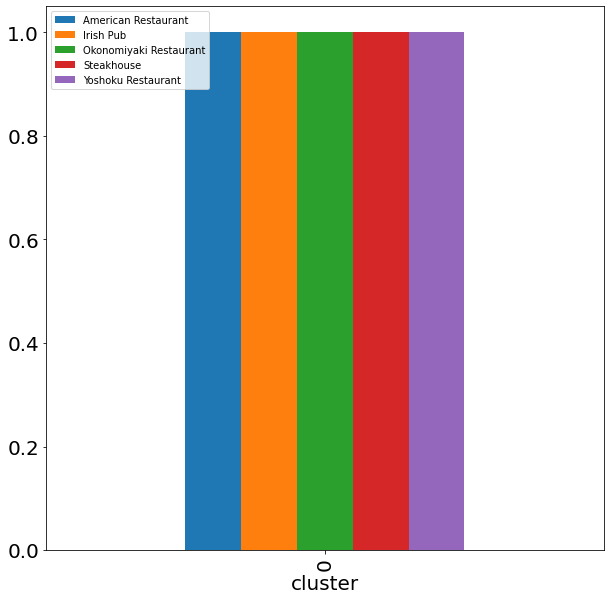

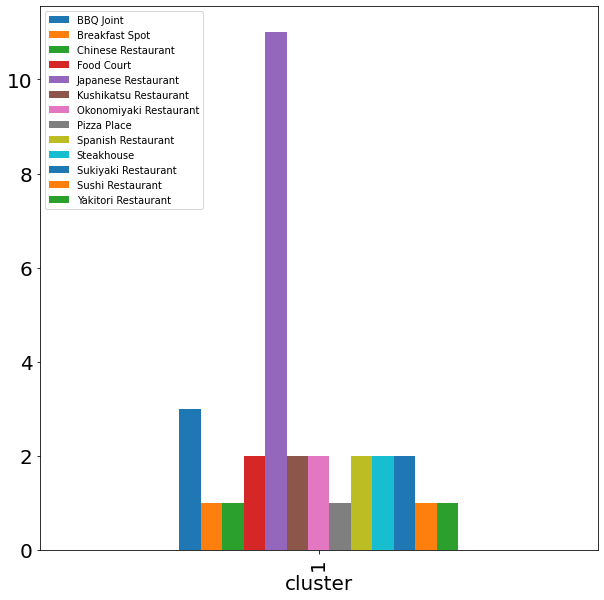

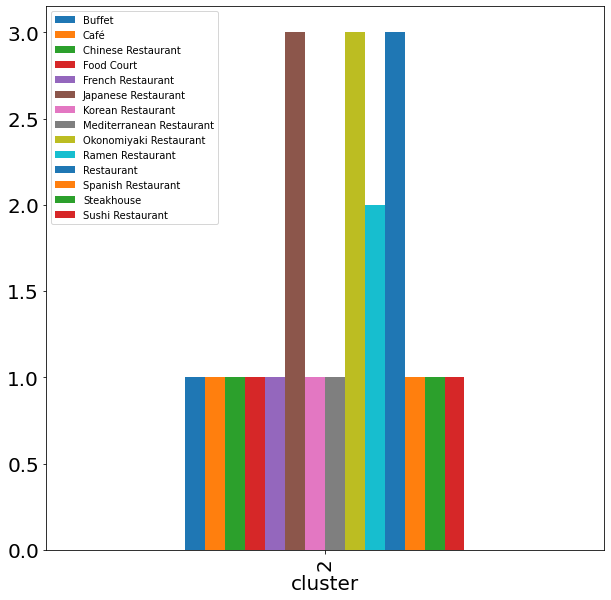

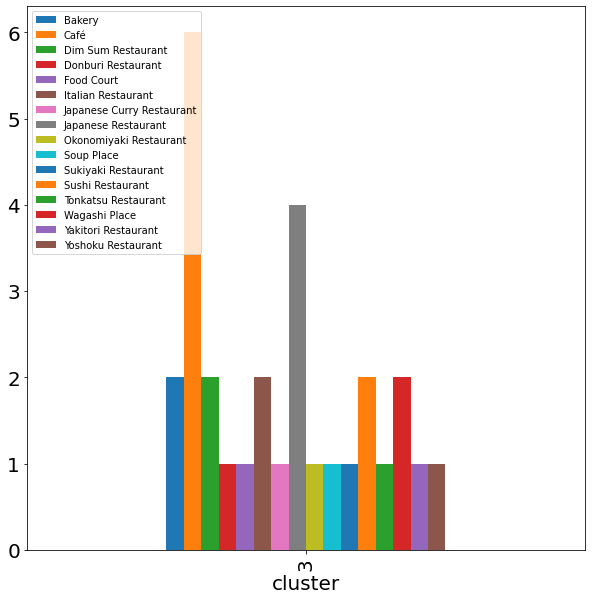

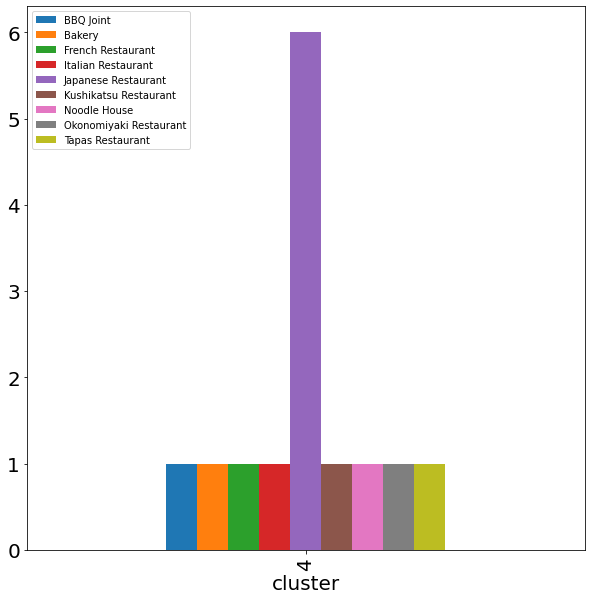

In [32]:
for clust in range(kclusters):
    df_k1xgs = (df_k1.loc[df_k1['cluster'] == clust]).groupby(['cluster','venue.categories'])['venue.categories'].count().unstack(1).plot.bar(figsize=(10, 10))
    plt.legend(loc=2, prop={'size': 10})
    plt.show()

<h4>Clustering x Restaurant Type in Sapporo</h4>

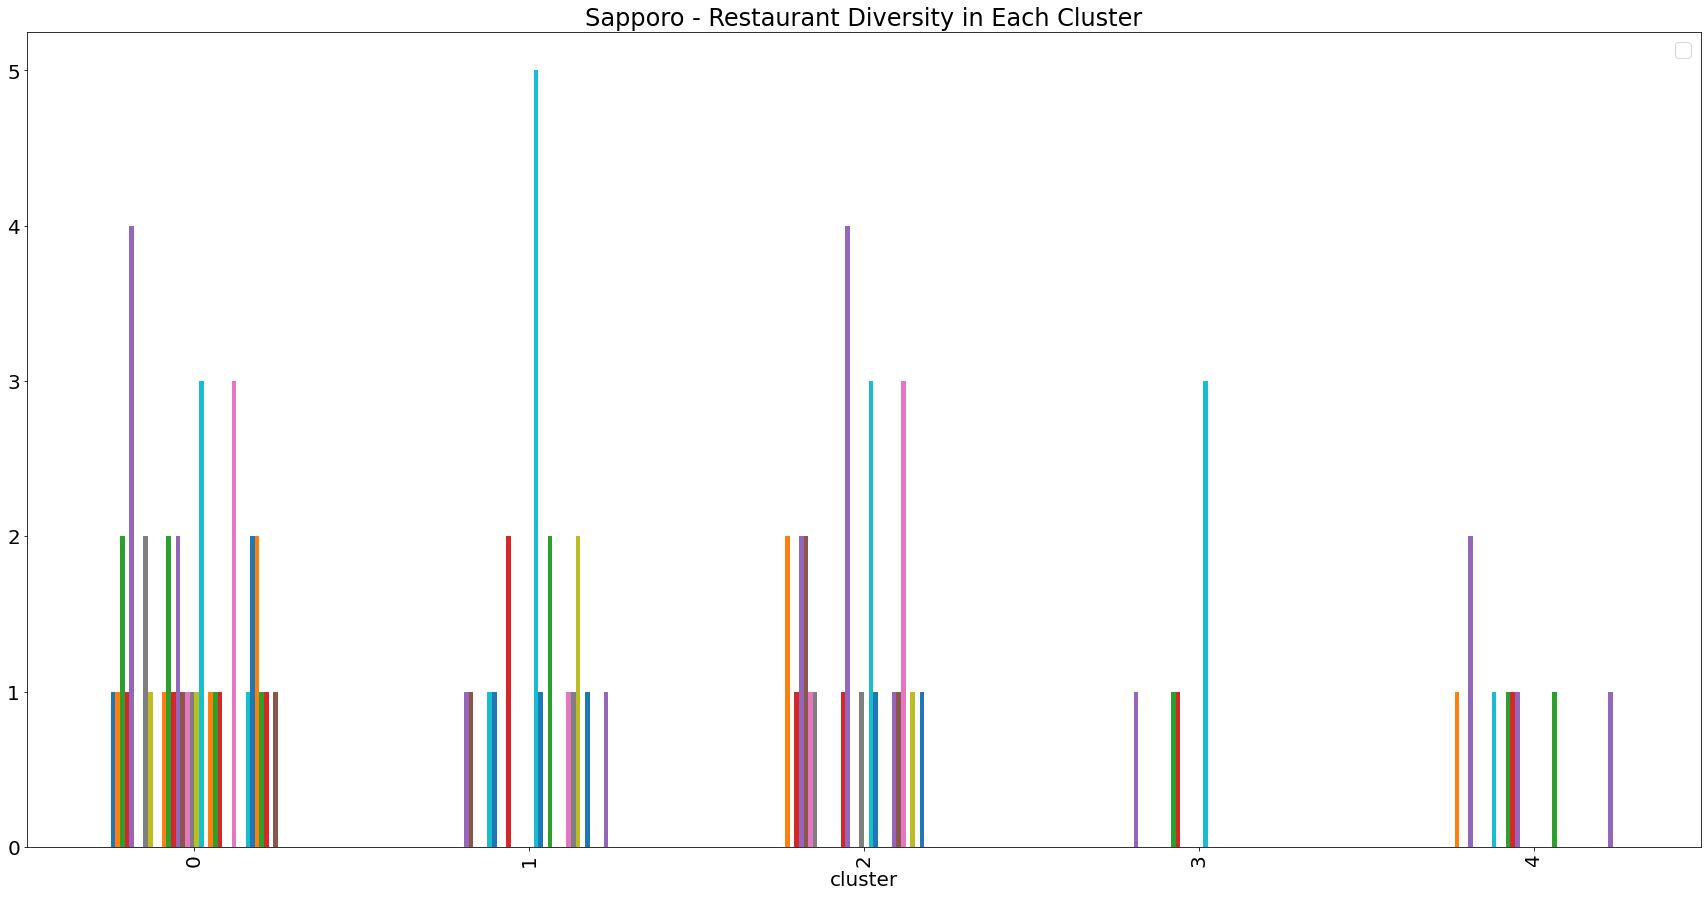

In [33]:
df_s1xgs = df_s1.groupby(['cluster','venue.categories'])['venue.categories'].count().unstack(1).plot.bar(figsize=(30, 15))

plt.title('Sapporo - Restaurant Diversity in Each Cluster')
plt.legend('')
plt.show()


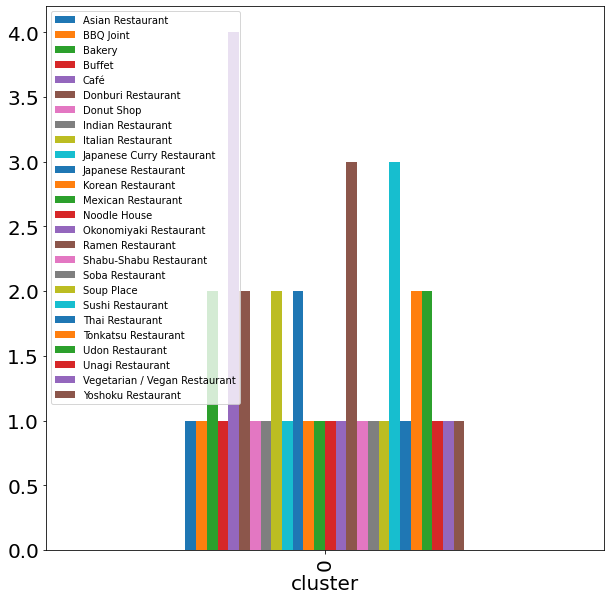

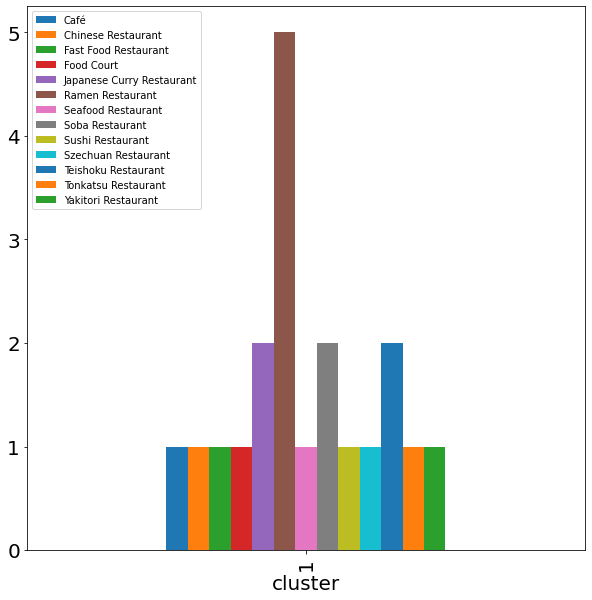

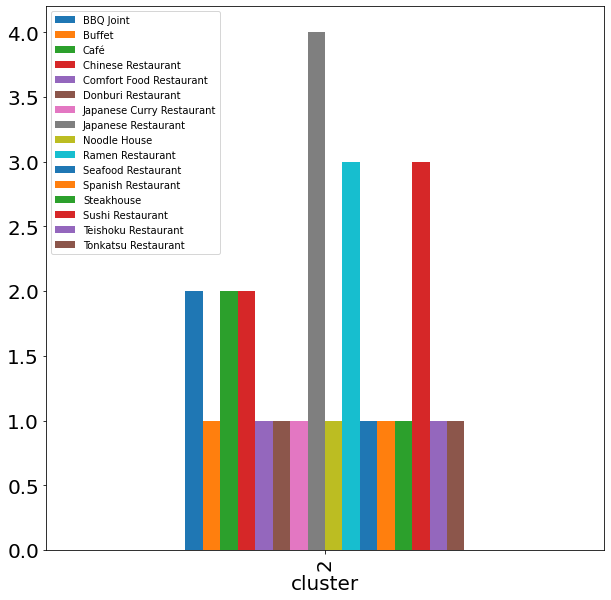

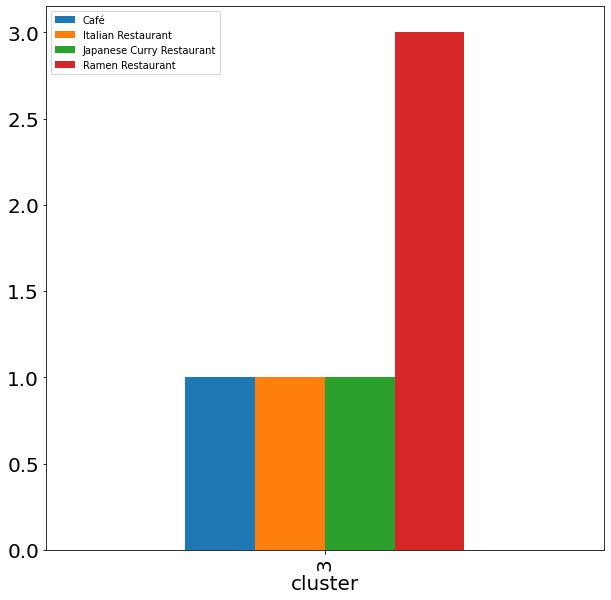

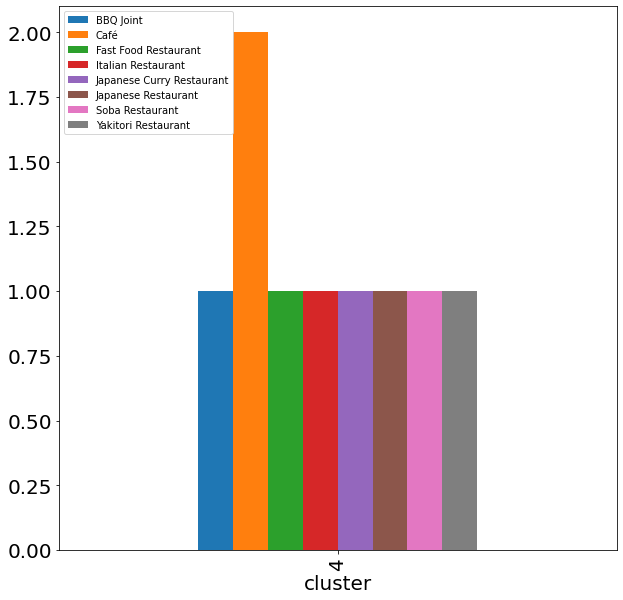

In [34]:
for clust in range(kclusters):
    df_s1xgs = (df_s1.loc[df_s1['cluster'] == clust]).groupby(['cluster','venue.categories'])['venue.categories'].count().unstack(1).plot.bar(figsize=(10, 10))
    plt.legend(loc=2, prop={'size': 10})
    plt.show()